In [2]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph,START,END,add_messages
from typing import TypedDict
from langgraph.checkpoint.memory import InMemorySaver
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from dotenv import load_dotenv

In [3]:
model= ChatOpenAI()

parser = StrOutputParser()

load_dotenv()

True

In [4]:
class JokeState(TypedDict):

    topic : str
    joke : str
    explanation : str

In [5]:
def generate_joke(state:JokeState)->dict:

    topic = state['topic']

    template = PromptTemplate(
        template = 'Generate a joke from following topic.\n{topic}',
        input_varibales=['topic']
    )

    chain = template | model | parser

    response = chain.invoke({'topic':topic})

    return {'joke':response}

In [6]:
def explanation(state:JokeState)->dict:

    joke = state['joke']

    template = PromptTemplate(
        template = "Generate the explanation of following joke. \n {joke} ",
        input_varibales=['joke']
    )

    chain = template | model | parser

    response = chain.invoke({'joke':joke})

    return {'explanation':response}

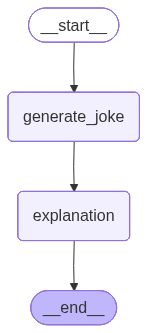

In [7]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke',generate_joke)
graph.add_node('explanation',explanation)

graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','explanation')
graph.add_edge('explanation',END)

checkpointer = InMemorySaver()

chatbot = graph.compile(checkpointer=checkpointer)

chatbot

In [13]:
config = {'configurable':{'thread_id':'thread-2'}}

In [14]:
initial_state = {'topic':'dosa'}

final_state = chatbot.invoke(initial_state,config=config)

final_state

{'topic': 'dosa',
 'joke': 'Why did the dosa refuse to play hide and seek?\n\nBecause it knew it would get all wrapped up in the game!',
 'explanation': 'This joke plays on the word "wrapped," as dosas are a type of South Indian pancake that is often wrapped or rolled up. So the dosa refused to play hide and seek because it knew it would get all wrapped up in the game, both literally and figuratively. This punny interpretation adds a playful twist to the joke.'}

In [15]:
print(final_state['topic'])
print('*'*100)
print(final_state['joke'])
print('*'*100)
print(final_state['explanation'])

dosa
****************************************************************************************************
Why did the dosa refuse to play hide and seek?

Because it knew it would get all wrapped up in the game!
****************************************************************************************************
This joke plays on the word "wrapped," as dosas are a type of South Indian pancake that is often wrapped or rolled up. So the dosa refused to play hide and seek because it knew it would get all wrapped up in the game, both literally and figuratively. This punny interpretation adds a playful twist to the joke.


In [16]:
chatbot.get_state(config)

StateSnapshot(values={'topic': 'dosa', 'joke': 'Why did the dosa refuse to play hide and seek?\n\nBecause it knew it would get all wrapped up in the game!', 'explanation': 'This joke plays on the word "wrapped," as dosas are a type of South Indian pancake that is often wrapped or rolled up. So the dosa refused to play hide and seek because it knew it would get all wrapped up in the game, both literally and figuratively. This punny interpretation adds a playful twist to the joke.'}, next=(), config={'configurable': {'thread_id': 'thread-2', 'checkpoint_ns': '', 'checkpoint_id': '1f110c4c-a201-68b0-8002-0983ec54b810'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-23T14:34:41.593156+00:00', parent_config={'configurable': {'thread_id': 'thread-2', 'checkpoint_ns': '', 'checkpoint_id': '1f110c4c-967a-6d49-8001-44589cf9e8af'}}, tasks=(), interrupts=())

In [17]:
for snap in chatbot.get_state_history(config):
    print(snap)

StateSnapshot(values={'topic': 'dosa', 'joke': 'Why did the dosa refuse to play hide and seek?\n\nBecause it knew it would get all wrapped up in the game!', 'explanation': 'This joke plays on the word "wrapped," as dosas are a type of South Indian pancake that is often wrapped or rolled up. So the dosa refused to play hide and seek because it knew it would get all wrapped up in the game, both literally and figuratively. This punny interpretation adds a playful twist to the joke.'}, next=(), config={'configurable': {'thread_id': 'thread-2', 'checkpoint_ns': '', 'checkpoint_id': '1f110c4c-a201-68b0-8002-0983ec54b810'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-23T14:34:41.593156+00:00', parent_config={'configurable': {'thread_id': 'thread-2', 'checkpoint_ns': '', 'checkpoint_id': '1f110c4c-967a-6d49-8001-44589cf9e8af'}}, tasks=(), interrupts=())
StateSnapshot(values={'topic': 'dosa', 'joke': 'Why did the dosa refuse to play hide and seek?\n\nBecause it k

In [20]:
chatbot.get_state({'configurable':{'thread_id':'thread-2','checkpoint_id':'1f110c4c-8cb0-62bf-8000-c0788f31af6e'}})

StateSnapshot(values={'topic': 'dosa'}, next=('generate_joke',), config={'configurable': {'thread_id': 'thread-2', 'checkpoint_id': '1f110c4c-8cb0-62bf-8000-c0788f31af6e'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2026-02-23T14:34:39.357817+00:00', parent_config={'configurable': {'thread_id': 'thread-2', 'checkpoint_ns': '', 'checkpoint_id': '1f110c4c-8cab-64b3-bfff-c16fab8c6b8a'}}, tasks=(PregelTask(id='49fff03a-60c1-ab42-edb8-2050c63ac751', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'Why did the dosa refuse to play hide and seek?\n\nBecause it knew it would get all wrapped up in the game!'}),), interrupts=())

In [21]:
chatbot.invoke(None,config={'configurable':{'thread_id':'thread-2','checkpoint_id':'1f110c4c-8cb0-62bf-8000-c0788f31af6e'}})

{'topic': 'dosa',
 'joke': "Why did the dosa break up with the sambar? \nBecause it couldn't handle the spicy relationship!",
 'explanation': 'This joke plays on the idea of a dosa, a South Indian dish made from fermented batter, breaking up with sambar, a spicy lentil-based stew typically served with dosa. The punchline suggests that the dosa ended the relationship with sambar because it couldn\'t handle the intense spiciness of the stew, referring to the sambar\'s strong flavor as causing the "spicy relationship" to be too much for the dosa to handle.'}

In [22]:
for snap in chatbot.get_state_history(config):
    print(snap)

StateSnapshot(values={'topic': 'dosa', 'joke': "Why did the dosa break up with the sambar? \nBecause it couldn't handle the spicy relationship!", 'explanation': 'This joke plays on the idea of a dosa, a South Indian dish made from fermented batter, breaking up with sambar, a spicy lentil-based stew typically served with dosa. The punchline suggests that the dosa ended the relationship with sambar because it couldn\'t handle the intense spiciness of the stew, referring to the sambar\'s strong flavor as causing the "spicy relationship" to be too much for the dosa to handle.'}, next=(), config={'configurable': {'thread_id': 'thread-2', 'checkpoint_ns': '', 'checkpoint_id': '1f110c60-db30-6d0c-8002-d7a82e8353d0'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-23T14:43:44.460314+00:00', parent_config={'configurable': {'thread_id': 'thread-2', 'checkpoint_ns': '', 'checkpoint_id': '1f110c60-d07f-6bfd-8001-74bcc579d795'}}, tasks=(), interrupts=())
StateSnapshot(v

In [24]:
config = {'configurable':{'thread_id':'thread-1'}}

chatbot.get_state(config)

StateSnapshot(values={'topic': 'idly', 'joke': "Why did the idly break up with the dosa?\n\nBecause it couldn't handle the battering!", 'explanation': 'This joke is a play on words using a double meaning of the word "battering." In the context of cooking, "battering" refers to the process of coating food in a mixture of flour and eggs before frying. However, in the joke, "battering" is used humorously to suggest that the idly (a type of Indian savory cake) ended the relationship with the dosa (a type of Indian pancake) because it could not handle the emotional "battering" or hardship in the relationship.'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f110c4b-50bf-6799-8002-9bc6ae2f59b5'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-23T14:34:06.229084+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f110c4b-41d8-678f-8001-c776deb28024'}}, tasks=(

In [25]:
for snap in chatbot.get_state_history(config):
    print(snap)

StateSnapshot(values={'topic': 'idly', 'joke': "Why did the idly break up with the dosa?\n\nBecause it couldn't handle the battering!", 'explanation': 'This joke is a play on words using a double meaning of the word "battering." In the context of cooking, "battering" refers to the process of coating food in a mixture of flour and eggs before frying. However, in the joke, "battering" is used humorously to suggest that the idly (a type of Indian savory cake) ended the relationship with the dosa (a type of Indian pancake) because it could not handle the emotional "battering" or hardship in the relationship.'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f110c4b-50bf-6799-8002-9bc6ae2f59b5'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-23T14:34:06.229084+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f110c4b-41d8-678f-8001-c776deb28024'}}, tasks=(

In [27]:
chatbot.update_state({'configurable':{'thread_id':'thread-1','checkpoint_ns': '','checkpoint_id':'1f110c4b-397e-6f5e-8000-ae785c5fc58b'}},{'topic':'medu vada'})

{'configurable': {'thread_id': 'thread-1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f110c73-b76a-6aa4-8001-c4d7927b892a'}}

In [28]:
for snap in chatbot.get_state_history(config):
    print(snap)

StateSnapshot(values={'topic': 'medu vada'}, next=('generate_joke',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f110c73-b76a-6aa4-8001-c4d7927b892a'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2026-02-23T14:52:10.736502+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f110c4b-397e-6f5e-8000-ae785c5fc58b'}}, tasks=(PregelTask(id='d5f7cd9f-ca9f-6a89-5593-c778d77623e3', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=())
StateSnapshot(values={'topic': 'idly', 'joke': "Why did the idly break up with the dosa?\n\nBecause it couldn't handle the battering!", 'explanation': 'This joke is a play on words using a double meaning of the word "battering." In the context of cooking, "battering" refers to the process of coating food in a mixture of flour and eggs before frying. However, in t

In [30]:
chatbot.invoke(None,{"configurable": {"thread_id": "1", "checkpoint_id": "1f110c73-b76a-6aa4-8001-c4d7927b892a"}})

EmptyInputError: Received no input for __start__